In [1]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

In [3]:
import pandas as pd


df1 = pd.read_csv("dataset.csv")
df1

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [4]:
df1['Timestamp'] = pd.to_datetime(df1['LastUpdatedDate'] + ' ' + df1['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')

In [5]:
df1 = df1.sort_values('Timestamp').reset_index(drop=True)

In [6]:
df1[["Timestamp", "Occupancy", "Capacity"]].to_csv("parking_stream1.csv", index=False)


In [7]:
# class ParkingSchema1(pw.Schema):
#     ID: int
#     SystemCodeNumber: str
#     Capacity: int
#     Latitude: float
#     Longitude: float
#     Occupancy: int
#     VehicleType: str
#     TrafficConditionNearby: str
#     QueueLength: int
#     IsSpecialDay: int
#     LastUpdatedDate: str
#     LastUpdatedTime: str
#     Timestamp: str  # already parsed into full timestamp
class ParkingSchema1(pw.Schema):
    Timestamp: str   # Timestamp of the observation (should ideally be in ISO format)
    Occupancy: int   # Number of occupied parking spots
    Capacity: int    # Total parking capacity at the location

In [8]:
data1 = pw.demo.replay_csv("parking_stream1.csv", schema=ParkingSchema1, input_rate=1000)


In [9]:
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
# - 't' contains the parsed full datetime
# - 'day' extracts the date part and resets the time to midnight (useful for day-level aggregations)
data_with_time1 = data1.with_columns(
    t1 = data1.Timestamp.dt.strptime(fmt),
    day1 = data1.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)

In [10]:
import datetime

delta_window1 = (
    data_with_time1.windowby(
        pw.this.t1,
        instance=pw.this.day1,
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t1=pw.this._pw_window_end,
        occ_max1=pw.reducers.max(pw.this.Occupancy),
        occ_min1=pw.reducers.min(pw.this.Occupancy),
        cap1=pw.reducers.max(pw.this.Capacity),
        #queue_avg=pw.reducers.mean(pw.this.QueueLength),  # optional
    )
    .with_columns(
        price1=10 + (pw.this.occ_max1 - pw.this.occ_min1) / pw.this.cap1
    )
)


In [11]:
pn.extension()

# Define a custom Bokeh plotting function that takes a data source (from Pathway) and returns a figure
def price_plotter(source):
    # Create a Bokeh figure with datetime x-axis
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Daily Parking Price",
        x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
    )
    # Plot a line graph showing how the price evolves over time
    fig.line("t1", "price1", source=source, line_width=2, color="navy")

    # Overlay red circles at each data point for better visibility
    fig.circle("t1", "price1", source=source, size=6, color="red")

    return fig

# Use Pathway's built-in .plot() method to bind the data stream (delta_window) to the Bokeh plot
# - 'price_plotter' is the rendering function
# - 'sorting_col="t"' ensures the data is plotted in time order
viz = delta_window1.plot(price_plotter, sorting_col="t1")
# Create a Panel layout and make it servable as a web app
# This line enables the interactive plot to be displayed when the app is served
pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn
import seaborn as sns

In [13]:
df2 = pd.read_csv('dataset.csv')
df2

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [14]:
 #Combine the 'LastUpdatedDate' and 'LastUpdatedTime' columns into a single datetime column
df2['Timestamp'] = pd.to_datetime(df2['LastUpdatedDate'] + ' ' + df2['LastUpdatedTime'],format='%d-%m-%Y %H:%M:%S')

# Sort the DataFrame by the new 'Timestamp' column and reset the index

traffic_map = {'low': 1, 'average': 2, 'high': 3}
vehicle_map = {'car': 1.0, 'bike': 0.5,'truck': 2.0, 'cycle': 0.2}  # Ex
df2['traffic_level_num'] =  df2["TrafficConditionNearby"].map(traffic_map).fillna(0)
df2['vehicle_weight_num'] =  df2["VehicleType"].map(vehicle_map).fillna(0)
df2 = df2.sort_values('Timestamp').reset_index(drop=True)
df2

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp,traffic_level_num,vehicle_weight_num
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00,1,1.0
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00,1,0.5
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00,1,1.0
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00,1,1.0
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00,1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00,1,1.0
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00,1,1.0
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00,1,0.2
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,19-12-2016,16:30:00,2016-12-19 16:30:00,1,1.0


In [15]:
df2[["Timestamp", "Occupancy", "Capacity","QueueLength","traffic_level_num","IsSpecialDay","vehicle_weight_num"]].to_csv("parking_stream2.csv", index=False)


In [16]:
park=pd.read_csv("parking_stream2.csv")
park

,Timestamp,Occupancy,Capacity,QueueLength,traffic_level_num,IsSpecialDay,vehicle_weight_num
0,2016-10-04 07:59:00,61,577,1,1,0,1.0
1,2016-10-04 07:59:00,237,1200,2,1,0,0.5
2,2016-10-04 07:59:00,264,687,2,1,0,1.0
3,2016-10-04 07:59:00,249,485,2,1,0,1.0
4,2016-10-04 07:59:00,614,1920,2,1,0,0.2
...,...,...,...,...,...,...,...
18363,2016-12-19 16:30:00,373,470,2,1,0,1.0
18364,2016-12-19 16:30:00,387,387,2,1,0,1.0
18365,2016-12-19 16:30:00,193,577,2,1,0,0.2
18366,2016-12-19 16:30:00,1671,3103,3,1,0,1.0


<Axes: >

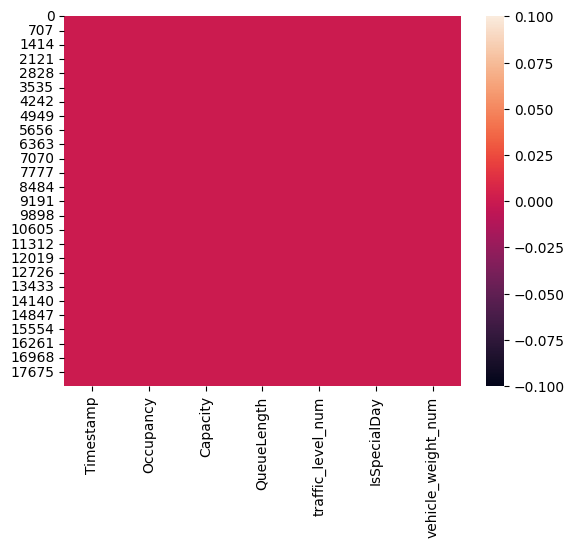

In [17]:
sns.heatmap(park.isnull())

In [18]:
class ParkingSchema2(pw.Schema):
    #ID: int
   # SystemCodeNumber: str
    Capacity: int
   # Latitude: float
   # Longitude: float
    Occupancy: int
    vehicle_weight_num: float
    traffic_level_num: int
    QueueLength: int
    IsSpecialDay: int
   # LastUpdatedDate: str
   # LastUpdatedTime: str
    Timestamp: str  # already parsed into full timestamp

In [19]:
data2 = pw.demo.replay_csv("parking_stream2.csv", schema=ParkingSchema2, input_rate=1000)


In [20]:
ALPHA = 0.6   # Weight for occupancy rate
BETA = 0.2    # Weight for queue length
GAMMA = 0.15  # Penalty for traffic level
DELTA = 0.3   # Boost for special day
EPSILON = 0.1 # Vehicle type weight
LAMBDA = 0.5  # Price adjustment factor
BASE_PRICE = 10.0

# Define mappings for categorical features
# traffic_map = {'low': 1, 'average': 2, 'high': 3}
# vehicle_map = {'car': 1.0, 'bike': 0.5,'truck': 2.0, 'cycle': 0.2}  # Extend this as needed

In [21]:
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
# - 't' contains the parsed full datetime
# - 'day' extracts the date part and resets the time to midnight (useful for day-level aggregations)
data_with_time2 = data2.with_columns(
    t2 = data2.Timestamp.dt.strptime(fmt),
    day2 = data2.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00"),


)

In [22]:
import datetime

delta_window2 = (
    data_with_time2.windowby(
        pw.this.t2,  # Event time column to use for windowing (parsed datetime)
        instance=pw.this.day2,  # Logical partitioning key: one instance per calendar day
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),  # Fixed-size daily window
        behavior=pw.temporal.exactly_once_behavior()  # Guarantees exactly-once processing semantics
    ) .reduce(
        t2=pw.this._pw_window_end,                        # Assign the end timestamp of each window
        occ_max2=pw.reducers.max(pw.this.Occupancy),      # Highest occupancy observed in the window
        occ_min2=pw.reducers.min(pw.this.Occupancy),      # Lowest occupancy observed in the window
        cap2=pw.reducers.max(pw.this.Capacity),           # Maximum capacity observed (typically constant per spot)

        queue_length_num = pw.reducers.max(pw.this.QueueLength), # Include queue length
        traffic_level_num = pw.reducers.max(pw.this.traffic_level_num), # Include traffic level
        is_special_day_num = pw.reducers.max(pw.this.IsSpecialDay), # Include special day
        vehicle_weight_num = pw.reducers.max(pw.this.vehicle_weight_num) # Include vehicle weight
    ))


In [23]:
reduced_data=delta_window2.with_columns(
        # Compute the price using a simple dynamic pricing formula:
        #
        # Pricing Formula:
        #     price = base_price + demand_fluctuation
        #     where:
        #         base_price = 10 (fixed minimum price)
        #         demand_fluctuation = (occ_max - occ_min) / cap
        #
        # Intuition:
        # - The greater the difference between peak and low occupancy in a day,
        #   the more volatile the demand is, indicating potential scarcity.
        # - Dividing by capacity normalizes the fluctuation (to stay in [0,1] range).
        # - This fluctuation is added to the base price of 10 to set the final price.
        # - Example: If occ_max = 90, occ_min = 30, cap = 100
        #            => price = 10 + (90 - 30)/100 = 10 + 0.6 = 10.6
        demand= (ALPHA*((pw.this.occ_max2 - pw.this.occ_min2) / pw.this.cap2)
                        +BETA*pw.this.queue_length_num
                        -GAMMA*pw.this.traffic_level_num
                        +DELTA*pw.this.is_special_day_num
                        +EPSILON*pw.this.vehicle_weight_num)

    )


In [24]:
norm_red_data=reduced_data.with_columns(
    normalized_demand = pw.this.demand / (1 + abs(pw.this.demand))
)

In [25]:
price_data= norm_red_data.with_columns(
        price2=10 * (1 + LAMBDA*pw.this.normalized_demand)
)

In [26]:
pn.extension()

def price_plotter(source):
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Model 2: Demand-Based Daily Parking Price",
        x_axis_type="datetime",
    )
    fig.line("t2", "price2", source=source, line_width=2, color="darkblue", legend_label="Dynamic Price")
    fig.circle("t2", "price2", source=source, size=6, color="red")
    fig.legend.location = "top_left"
    return fig

# Create reactive visualization
viz = price_data.plot(price_plotter, sorting_col="t2")

# Display it as a Panel app
pn.Column(viz).servable()


Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [27]:
%%capture --no-display
pw.run()

Output()